# Rosenbrock OUU Results

In [269]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
from scipy.optimize import minimize, Bounds, NonlinearConstraint

## Global constraint space
Plot the constraint sum over the parameter space.

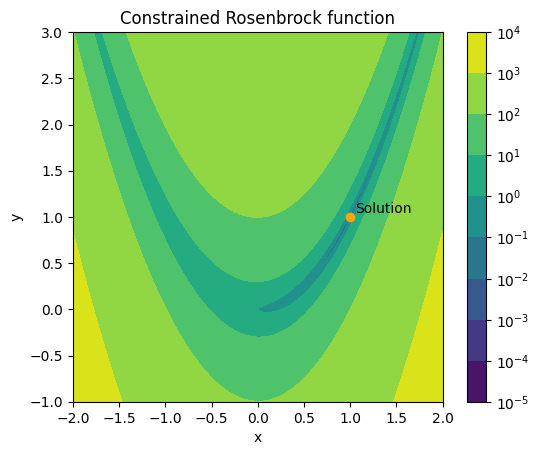

In [270]:
point_cmap = matplotlib.colormaps["plasma"]


def rosenbrock(x: np.ndarray) -> np.ndarray:
    """Rosenbrock function.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector

    Returns
    -------
    np.ndarray
        Result of Rosenbrock function
    """
    a = 1
    b = 100
    return (a - x[0]) ** 2 + b * (x[1] - x[0] ** 2) ** 2


# con1 with uncertainty addition
def con1_unc(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    """Value of constraint 1.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector
    e : np.ndarray
        Epistemic uncertainties

    Returns
    -------
    np.ndarray
        Value of constraint
    """
    # return (x[0] - 1) ** 3 - x[1] + 1 + e[0]
    return (x[0] + 2 * e[0]) ** 3 - x[1]


def con2_unc(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    """Value of constraint 2.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector
    e : np.ndarray
        Epistemic uncertainties

    Returns
    -------
    np.ndarray
        Value of constraint
    """
    # return x[0] + x[1] - 2
    return x[0] + (x[1] + e[1]) ** 2 - 2


def constraints_unc(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    """Calculate values of all constraints.

    Parameters
    ----------
    x : np.ndarray
        Optimisation parameter vector
    e : np.ndarray
        Epistemic uncertainties

    Returns
    -------
    np.ndarray
        Values of all constraints
    """
    return np.array([con1_unc(x, e), con2_unc(x, e)])


def constraint_sum(x: np.ndarray, e: np.ndarray) -> np.ndarray:
    # Find value of each constraint at each coordinate point
    cons = constraints_unc(x, e)
    # Return sum of constraints at each point
    return np.sum(cons, axis=0)


N = 300
x = np.linspace(-2, 2, N)
y = np.linspace(-1, 3, N)
xx, yy = np.meshgrid(x, y)
# x_vec is vector containing x and y coordinate matrices
x_vec = np.array([xx, yy])
zz = rosenbrock(x_vec)

fig, ax = plt.subplots()


def plot_obj_func(fig, ax):
    contour_set = ax.contourf(x, y, zz, locator=matplotlib.ticker.LogLocator())
    ax.axis("scaled")
    fig.colorbar(contour_set)
    ax.set_title("Constrained Rosenbrock function")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Add solution point
    ax.plot(1.0, 1.0, "o", color="orange")
    ax.annotate("Solution", (1.05, 1.05))


plot_obj_func(fig, ax)

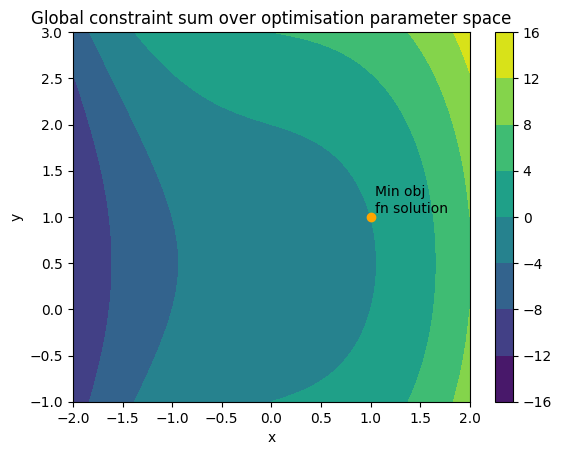

In [271]:
# Constraints
# Constraints with no uncertainties
con_sum = constraint_sum(x_vec, np.array([0.0, 0.0]))

fig, ax = plt.subplots()


def plot_con_sum(fig, ax):
    contour_set = ax.contourf(x, y, con_sum)
    # ax.axis("scaled")
    fig.colorbar(contour_set)
    ax.set_title("Global constraint sum over optimisation parameter space")
    ax.set_xlabel("x")
    ax.set_ylabel("y")

    # Add solution point
    ax.plot(1.0, 1.0, "o", color="orange")
    ax.annotate("Min obj\nfn solution", (1.05, 1.05))
    # ax.plot(-1.0, 1.0, "o", color="lightgreen")
    # ax.annotate("Safe", (-0.95, 1.05))
    # ax.plot(1.5, 2.0, "o", color="red")
    # ax.annotate("Dangerous", (1.0, 2.15))


plot_con_sum(fig, ax)

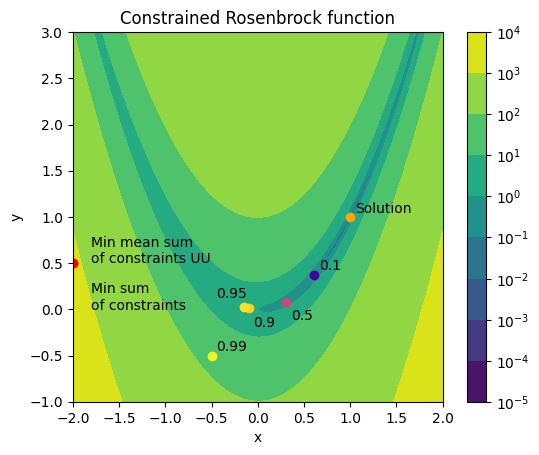

In [272]:
# Results
results = np.array(
    [
        # Commented out are e[0] UB = 1.5, rather than 1.0
        # [-1.8025065721e-03, -1.2551861355e-02, 0.1],
        [6.1333298716e-01, 3.7541138677e-01, 0.1],
        # [-1.1506037092e-01, 1.1555954333e-02, 0.5],
        [3.0788350409e-01, 8.4179912207e-02, 0.5],
        # [-6.8921492758e-01, 4.7600590134e-01, 0.9],
        [-9.5522677312e-02, 1.2090749223e-02, 0.9],
        # [-6.6807635442e-01, 4.5043023310e-01, 0.95],
        [-1.5257569280e-01, 2.5507325290e-02, 0.95],
        [-4.9926509048e-01, -4.9977705744e-01, 0.99],
    ]
)


def plot_ouu_solns(fig, ax):
    # Plot points over both obj_func and constraint plots
    ax.plot(-2.0, 0.5, "o", color="red")
    ax.annotate("Min mean sum\nof constraints UU", (-1.8, 0.5))
    # Certain solution also lies here
    ax.plot(-2.0, 0.5, "o", color="red")
    ax.annotate("Min sum\nof constraints", (-1.8, 0.0))

    # original cons, bounds of e[0] enlarged
    # 0 active
    ax.plot(results[0, 0], results[0, 1], "o", color=point_cmap(results[0, 2]))
    ax.annotate("0.1", (results[0, 0] + 0.05, results[0, 1] + 0.05))

    # I think 1 active con
    ax.plot(results[1, 0], results[1, 1], "o", color=point_cmap(results[1, 2]))
    ax.annotate("0.5", (results[1, 0] + 0.05, results[1, 1] - 0.2))

    # # No active cons in soln (? really?)
    ax.plot(results[2, 0], results[2, 1], "o", color=point_cmap(results[2, 2]))
    ax.annotate("0.9", (results[2, 0] + 0.05, results[2, 1] - 0.2))

    # # 1 active
    ax.plot(results[3, 0], results[3, 1], "o", color=point_cmap(results[3, 2]))
    ax.annotate("0.95", (results[3, 0] - 0.3, results[3, 1] + 0.1))

    # # 1 active
    ax.plot(results[4, 0], results[4, 1], "o", color=point_cmap(results[4, 2]))
    ax.annotate("0.99", (results[4, 0] + 0.05, results[4, 1] + 0.05))


fig, ax = plt.subplots()
plot_obj_func(fig, ax)
plot_ouu_solns(fig, ax)

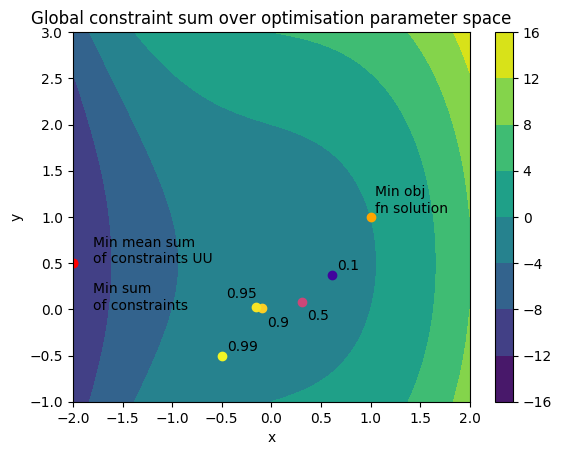

In [273]:
fig, ax = plt.subplots()
plot_con_sum(fig, ax)
plot_ouu_solns(fig, ax)

The solution is still feasible under no uncertainty.

## Comparison of local constraint spaces under uncertainty
Visualise the local uncertain constraint space (at a given point, i.e. the solution) under uncertainty.

Text(0, 0.5, 'e2')

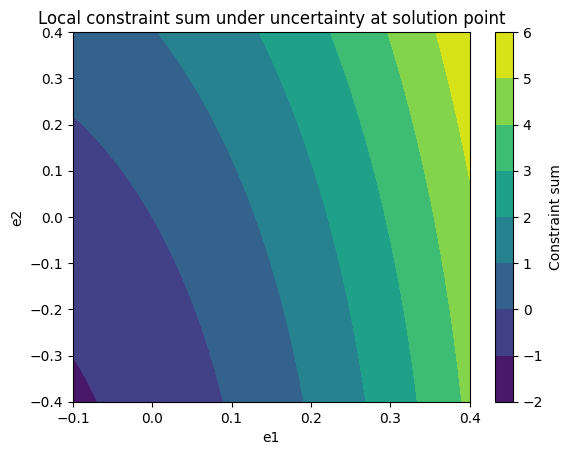

In [274]:
# Define epistemic uncertainty
# e1 = np.array([-0.1, 0.4])
e1 = np.array([-0.1, 1.0])
e2 = np.array([-0.4, 0.4])

# Define uncertainty space
e1_space = np.linspace(e1[0], e1[1], N)
e2_space = np.linspace(e2[0], e2[1], N)
e1_mesh, e2_mesh = np.meshgrid(e1_space, e2_space)
# unc_vec is vector containing e1 and e2 coordinate matrices
unc_vec = np.array([e1_mesh, e2_mesh])
# Local point (solution) to evaluate uncertain constraints at
sol_point = [1.0, 1.0]
con_sum_unc = constraint_sum(sol_point, unc_vec)

fig, ax = plt.subplots()
contour_set = ax.contourf(e1_space, e2_space, con_sum_unc)
fig.colorbar(contour_set, label="Constraint sum")
ax.set_title("Local constraint sum under uncertainty at solution point")
ax.set_xlabel("e1")
ax.set_ylabel("e2")

Subplots?